In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal,ndimage
import random



def abrirArquivo(path,frequencia):
    df = pd.read_excel(path)
    sec = 1/frequencia
    tempo = [0+(i*sec) for i in range(len(df))]
    df['Tempo'] = tempo
    return df

def acharPicos(df):
    clean = df['ECG1']
    picos,_ = signal.find_peaks(clean,prominence=1)
    return (picos)

def frequenciaDefArritmia(df,picos):
    teste = df.iloc[picos]['Tempo'].tolist()
    difs= []
    for i in range(len(teste)-1):
        dif = teste[i+1]- teste[i]  
        difs.append(dif)
    avg = sum(difs)/len(difs)
    frequenciaBPM = 60/avg
    arritmia = False
    for i in difs:
        if (((i)>avg*1.15) or ((i)<avg*0.85)):
            arritmia = True
    if(arritmia):
        print('O paciente apresenta arritmia')
    return f'{frequenciaBPM:.2f} BPM'

def produzirGrafico(df,picos):
    pico = random.randrange(0,len(picos))
    plt.plot(df['Tempo'],df['ECG1'])
    centro = (df.iloc[picos[pico]]['Tempo'])
    plt.title(f'Grafico para o {pico+1}º pico')
    plt.xlim([centro-0.1, centro+0.1])
    plt.xlabel('Tempo(S)')
    plt.ylabel('Amplitude(mV)')
    return plt.show()


    base = df['ECG1'].median()
    # teste = df.set_index('Tempo')
    vales,_ = signal.find_peaks(-df['ECG1'],prominence=0.25,distance=5)
    q = vales[0::2]
    s = vales[1::2]
    print(f'{base:.2f}')
    plt.plot(df['Tempo'],df['ECG1'])
    plt.axhline(base)
    plt.plot(df.iloc[vales]['Tempo'],df.iloc[vales]['ECG1'],'X')
    # plt.plot(filter)
    # plt.xlim([0,500])

    mediaR = (df.iloc[picos]['ECG1'].mean())+base
    mediaQ = (df.iloc[q]['ECG1'].mean())-base
    mediaS = (df.iloc[s]['ECG1'].mean())-base
    print(f'A linha de base é: {base}')
    print(f"""Amplitude média
    Amplitude R/Q = {mediaR-mediaQ}
    Amplitude R/S = {mediaR-mediaS}\n""")
    for i in range(len(picos)):
        vPico=(df.iloc[picos[i]]['ECG1'])-base
        vQ=(df.iloc[q[i]]["ECG1"])+base
        vS=(df.iloc[s[i]]["ECG1"])+base
        ampRS = vPico+vS
        ampRQ = vPico+vQ
        print(f"""Amplitudes do {i+1}º pico
        Amplitude R/Q = {ampRQ}
        Amplitude R/S = {ampRS}\n""")
    return plt.show()

def baseNova(df,picos,prominencia):
    base = df['ECG1'].median()
    vales,_ = signal.find_peaks(-df['ECG1'],prominence=prominencia,distance=5)
    plt.plot(df['Tempo'],df['ECG1'])
    plt.axhline(base)
    plt.plot(df.iloc[vales]['Tempo'],df.iloc[vales]['ECG1'],'X')
    listVales = vales.tolist()
    listPicos = picos.tolist()
    listTotal = listPicos + listVales
    listTotal.sort()
    counter = 1
    rQ = []
    rS = []
    print(f'A linha de base é: {base}')
    for i in listPicos:
        indexR = listTotal.index(i)
        indexQ = indexR-1
        indexS = indexR+1
        vR = df.iloc[listTotal[indexR]]['ECG1'] - base
        vQ = df.iloc[listTotal[indexQ]]['ECG1'] - base
        vS = df.iloc[listTotal[indexS]]['ECG1'] - base
        ampRS = vR/(-vS)
        ampRQ = vR/(-vQ)
        rQ.append(ampRQ)
        rS.append(ampRS)
        print(f"""Amplitudes do {counter}º pico
        Amplitude R/Q = {ampRQ}
        Amplitude R/S = {ampRS}\n""")
        counter += 1
    print(f"""amplitude média
    R/Q = {sum(rQ)/len(rQ)}
    R/S = {sum(rS)/len(rS)}""")
    return plt.show()

tabelaNormal = abrirArquivo('ecg_normal.xlsx',128)
tabelaArritmia = abrirArquivo('ecg_arritmia.xlsx',360)

# Achar picos das ondas R

In [2]:
print('------Tabela Normal-------')
print(acharPicos(tabelaNormal))
print('\n------Tabela Arritmia-------')
print(acharPicos(tabelaArritmia))

------Tabela Normal-------
[  54  131  209  286  365  444  523  600  677  756  835  917  998 1077
 1157 1239]

------Tabela Arritmia-------
[  77  370  663  947 1231 1515 1809 2045 2403 2706 2998 3283 3560]


# Achar frequencia cardiaca e verificar arritmia

In [3]:
print('------Tabela Normal-------')
print(frequenciaDefArritmia(tabelaNormal,acharPicos(tabelaNormal)))
print('\n------Tabela Arritmia-------')
print(frequenciaDefArritmia(tabelaArritmia,acharPicos(tabelaArritmia)))

------Tabela Normal-------
97.22 BPM

------Tabela Arritmia-------
O paciente apresenta arritmia
74.42 BPM


# Grafico para um determinado pico

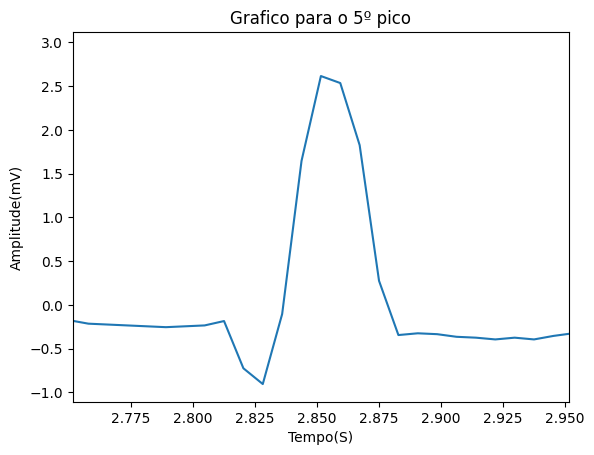

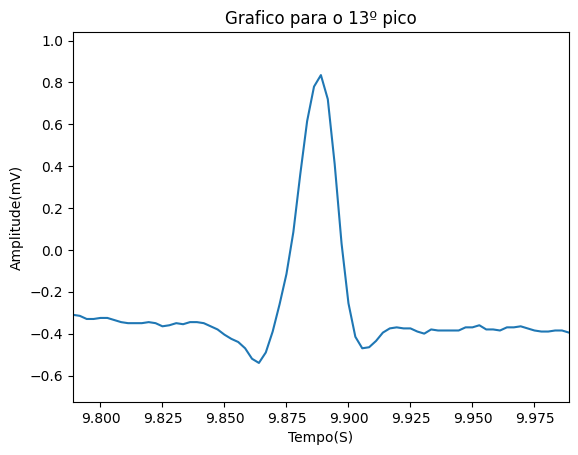

In [4]:
produzirGrafico(tabelaNormal,acharPicos(tabelaNormal))
produzirGrafico(tabelaArritmia,acharPicos(tabelaArritmia))

# Linha de base e Amplitudes

A linha de base é: -0.145
Amplitudes do 1º pico
        Amplitude R/Q = 3.971830985915493
        Amplitude R/S = 10.444444444444443

Amplitudes do 2º pico
        Amplitude R/Q = 4.205479452054794
        Amplitude R/S = 16.157894736842103

Amplitudes do 3º pico
        Amplitude R/Q = 4.285714285714286
        Amplitude R/S = 15.000000000000002

Amplitudes do 4º pico
        Amplitude R/Q = 4.391304347826087
        Amplitude R/S = 13.17391304347826

Amplitudes do 5º pico
        Amplitude R/Q = 3.6315789473684212
        Amplitude R/S = 11.040000000000001

Amplitudes do 6º pico
        Amplitude R/Q = 3.6363636363636362
        Amplitude R/S = 11.2

Amplitudes do 7º pico
        Amplitude R/Q = 4.9
        Amplitude R/S = 18.375

Amplitudes do 8º pico
        Amplitude R/Q = 4.169014084507042
        Amplitude R/S = 15.57894736842105

Amplitudes do 9º pico
        Amplitude R/Q = 5.000000000000001
        Amplitude R/S = 18.4375

Amplitudes do 10º pico
        Amplitude R/Q = 4.5454

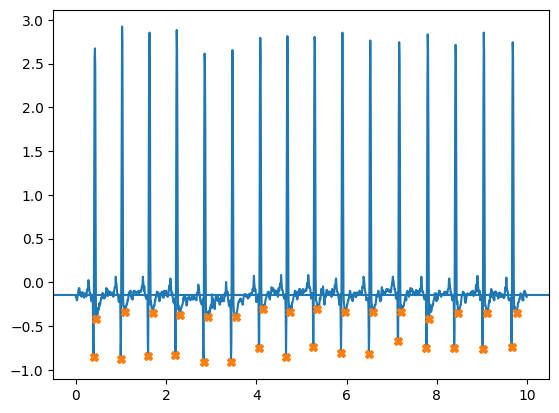

A linha de base é: -0.345
Amplitudes do 1º pico
        Amplitude R/Q = 8.464285714285714
        Amplitude R/S = 13.166666666666664

Amplitudes do 2º pico
        Amplitude R/Q = 6.76315789473684
        Amplitude R/S = 9.884615384615383

Amplitudes do 3º pico
        Amplitude R/Q = 5.800000000000001
        Amplitude R/S = 8.156249999999998

Amplitudes do 4º pico
        Amplitude R/Q = 4.016666666666667
        Amplitude R/S = 6.885714285714284

Amplitudes do 5º pico
        Amplitude R/Q = 5.295454545454546
        Amplitude R/S = 7.516129032258063

Amplitudes do 6º pico
        Amplitude R/Q = 6.149999999999998
        Amplitude R/S = 7.93548387096774

Amplitudes do 7º pico
        Amplitude R/Q = 6.789473684210525
        Amplitude R/S = 10.32

Amplitudes do 8º pico
        Amplitude R/Q = 5.4222222222222225
        Amplitude R/S = 9.037037037037036

Amplitudes do 9º pico
        Amplitude R/Q = 5.347826086956522
        Amplitude R/S = 5.999999999999998

Amplitudes do 10º pico


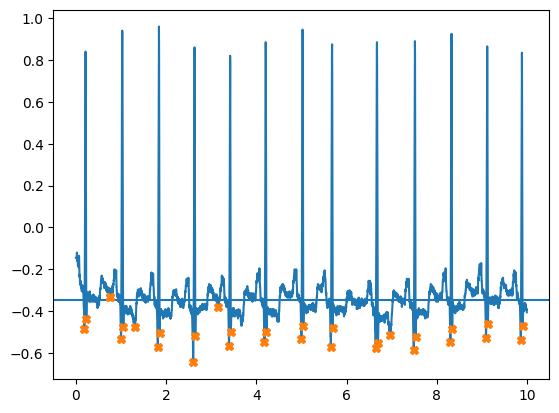

In [5]:
baseNova(tabelaNormal,acharPicos(tabelaNormal),0.25)

baseNova(tabelaArritmia,acharPicos(tabelaArritmia),0.1)